In [63]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

sns.set_style('darkgrid')

In [64]:
user_reviews = pd.read_parquet(r"C:\Users\roylo\OneDrive\Documentos\Data Science\Proyectos Individuales\Machine Learning Operations\Datasets\user_reviews.parquet")

user_reviews.head()

,user_id,posted,item_id,recommend,sentiment_analysis
0,76561197970982479,2011-11-05,1250,True,2
1,76561197970982479,2011-07-15,22200,True,1
2,76561197970982479,2011-04-21,43110,True,2
3,js41637,2014-06-24,251610,True,1
4,js41637,2013-09-08,227300,True,1


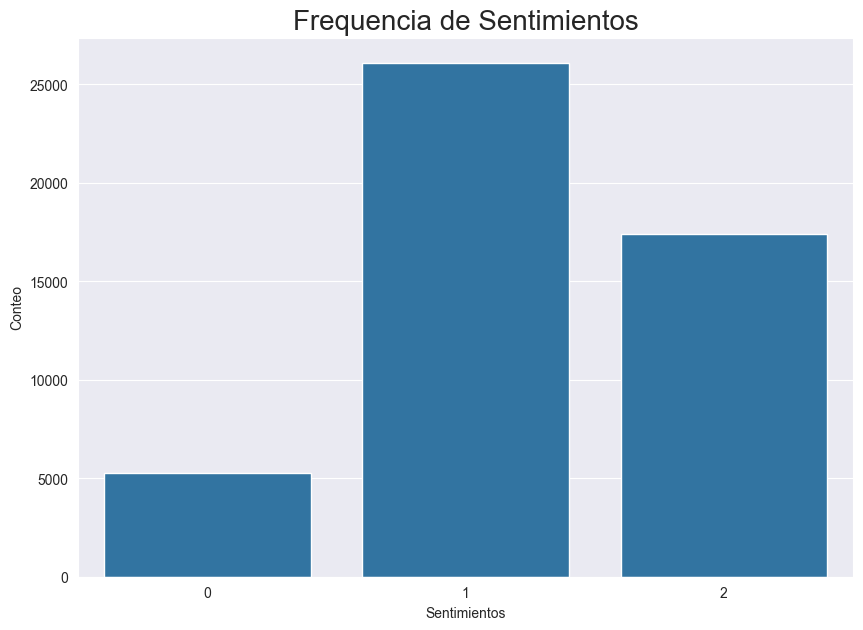

In [65]:
plt.figure(figsize=(10,7))

sns.countplot(data=user_reviews, x='sentiment_analysis')

plt.title("Frequencia de Sentimientos",fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Sentimientos")
plt.show()

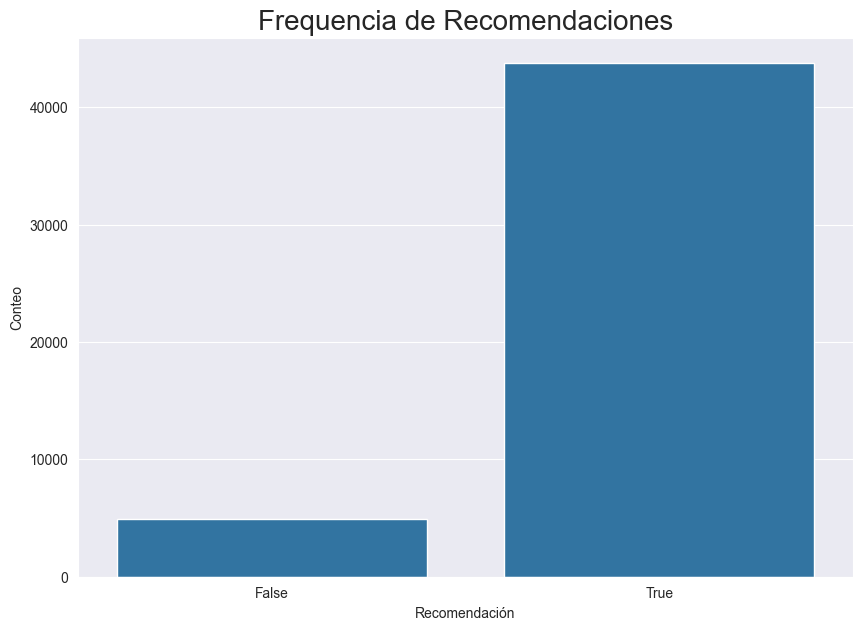

In [75]:
plt.figure(figsize=(10,7))

sns.countplot(data=user_reviews, x='recommend',)

plt.title("Frequencia de Recomendaciones",fontsize=20)
plt.ylabel("Conteo")
plt.xlabel("Recomendación")
plt.show()

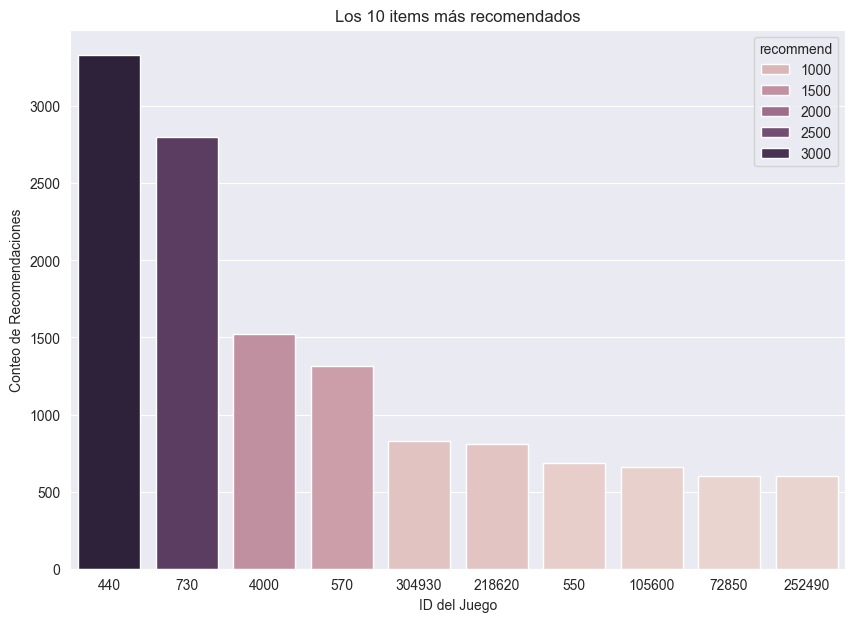

In [72]:
recommended = user_reviews[user_reviews['recommend']==True].groupby(by='item_id')['recommend'].count().sort_values(ascending=False)[:10]

plt.figure(figsize=(10,7))

sns.barplot(x=recommended.index,y=recommended,order=recommended.index,hue=recommended)

plt.title("Los 10 items más recomendados")
plt.ylabel("Conteo de Recomendaciones")
plt.xlabel("ID del Juego")
plt.show()

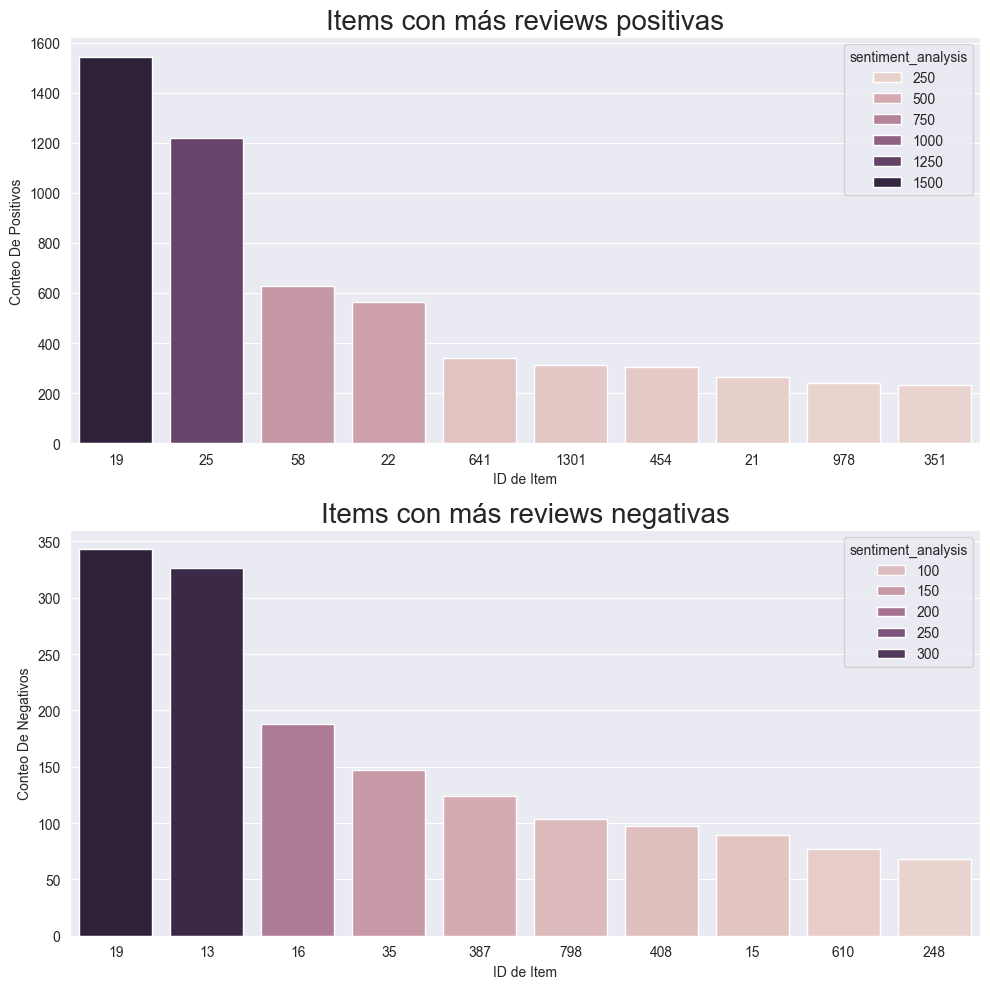

In [87]:
pos_count = user_reviews[user_reviews['sentiment_analysis']==2].groupby(by='item_id')['sentiment_analysis'].count().reset_index(drop=True).sort_values(ascending=False)[:10]

neg_count = user_reviews[user_reviews['sentiment_analysis']==0].groupby(by='item_id')['sentiment_analysis'].count().reset_index(drop=True).sort_values(ascending=False)[:10]

fig, (ax1,ax2) = plt.subplots(2,1)
fig.set_figheight(10)
fig.set_figwidth(10)

sns.barplot(x=pos_count.index,y=pos_count,hue=pos_count,ax=ax1,order=pos_count.index)
ax1.set_title("Items con más reviews positivas",fontsize=20)
ax1.set_ylabel("Conteo De Positivos")
ax1.set_xlabel("ID de Item")

sns.barplot(x=neg_count.index, y=neg_count, hue=neg_count,ax=ax2,order=neg_count.index)
ax2.set_title("Items con más reviews negativas",fontsize=20)
ax2.set_ylabel("Conteo De Negativos")
ax2.set_xlabel("ID de Item")

plt.tight_layout()
plt.show()